<h2>Import bibliotek</h2>

In [1]:
from activations.ReLU import ReLU
from enums.TypeOfLayer import TypeOfLayer
from loss.CategoricalCrossEntropy import CategoricalCrossEntropy
from loss.MeanSquaredError import MeanSquaredError
from metrics.Accuracy import Accuracy
from enums.TypeOfData import TypeOfData
from models.Dense import Dense
from models.NeuralNetwork import NeuralNetwork
from models import NeuralStatistics
import numpy as np
import matplotlib.pyplot as plt

<h2>Laboratorium 3 Zadanie 1</h2>
<h3>Rozbuduj sieć z zadania 4 z laboratorium 1 o funkcję aktywacji ReLU w warstwie ukrytej. Przetestujdziałanie sieci dla następujących danych wejściowych:</h3>

In [2]:
model = NeuralNetwork()
model.add_layer(Dense(units=3, activation=ReLU(), type=TypeOfLayer.INPUT))   # 0
model.add_layer(Dense(units=3, activation=ReLU(), type=TypeOfLayer.HIDDEN))  # 1
model.add_layer(Dense(units=3, activation=ReLU(), type=TypeOfLayer.OUTPUT))  # 2

input_data = np.array([
    [8.5, 0.65, 1.2],
    [9.5, 0.8, 1.3],
    [9.9, 0.8, 0.5],
    [9.0, 0.9, 1.0]
])

expected_output = np.array([
    [0.1, 1.0, 0.1],
    [0.0, 1.0, 0.0],
    [0.0, 0.0, 0.1],
    [0.1, 1.0, 0.2]
])

weight_1 = np.array([
    [0.1, 0.2, -0.1],
    [-0.1, 0.1, 0.9],
    [0.1, 0.4, 0.1]
])

weight_2 = np.array([
    [0.3, 1.1, -0.3],
    [0.1, 0.2, 0.0],
    [0.0, 1.3, 0.1]
])

model.add_weights(1, weights=weight_1)
model.add_weights(2, weights=weight_2)
model.compile(loss=CategoricalCrossEntropy(), metrics=[Accuracy()])
model.fit(x=input_data, y=expected_output, epochs=3, learning_rate=0.01, debug=True)


Teaching progress: [--------------->    ] 83.333333 %

part pred_y after epocs 1, series 1 : [0.2135 0.145  0.5065]
part pred_y after epocs 1, series 2 : [0.         0.12444651 0.12890576]
part pred_y after epocs 1, series 3 : [0.         0.17422646 0.12002058]
part pred_y after epocs 1, series 4 : [0.         0.15126706 0.11968113]
part pred_y after epocs 2, series 1 : [0.         0.16912137 0.10964365]
part pred_y after epocs 2, series 2 : [0.         0.23099201 0.12373714]
part pred_y after epocs 2, series 3 : [0.05794085 0.29003734 0.11597309]
part pred_y after epocs 2, series 4 : [0.         0.24909101 0.11666774]
part pred_y after epocs 3, series 1 : [0.02112663 0.26412395 0.1087927 ]
part pred_y after epocs 3, series 2 : [0.05321298 0.34462838 0.12441832]
part pred_y after epocs 3, series 3 : [0.11540837 0.41184779 0.11787887]
part pred_y after epocs 3, series 4 : [0.02968091 0.34635215 0.11849072]


In [3]:
statistics = model.statistics
print('predict: ',model.predict)
print('condensed_error: ', statistics.condensed_error)

predict:  {<TypeOfData.TRAINING: (1,)>: array([[0.02112663, 0.26412395, 0.1087927 ],
       [0.05321298, 0.34462838, 0.12441832],
       [0.11540837, 0.41184779, 0.11787887],
       [0.02968091, 0.34635215, 0.11849072]])}
condensed_error:  [8.3744478039083, 8.54834569655455, 7.384429431527877]


Oczekiwany wynik po 3 serii danych:•wyjście sieci -output=[−0.078    0.11    0.136].<br>
Otrzymane przeze mnie wartości to [0.         0.17422646 0.12002058]

<h2>Laboratorium 3 Zadanie 2</h2>
<h3>Zmodyfikuj  sieć  z  zadania  1  w  taki  sposób,  aby  w  każdej  iteracji  następowała  aktualizacja  wagkażdego z neuronów w warstwie ukrytej i wyjściowej, tak jak zostało to pokazane w przykładzie 3.Przetestuj działanie sieci dla następujących danych wejściowych:</h3>

In [4]:
from activations.ReLU import ReLU
from enums.TypeOfLayer import TypeOfLayer
from loss.CategoricalCrossEntropy import CategoricalCrossEntropy
from loss.MeanSquaredError import MeanSquaredError
from metrics.Accuracy import Accuracy
from models.Layer import Layer
from models.NeuralNetwork import NeuralNetwork
from models import NeuralStatistics
import numpy as np
import matplotlib.pyplot as plt

Teaching progress: [------------------->] 100.000000 %

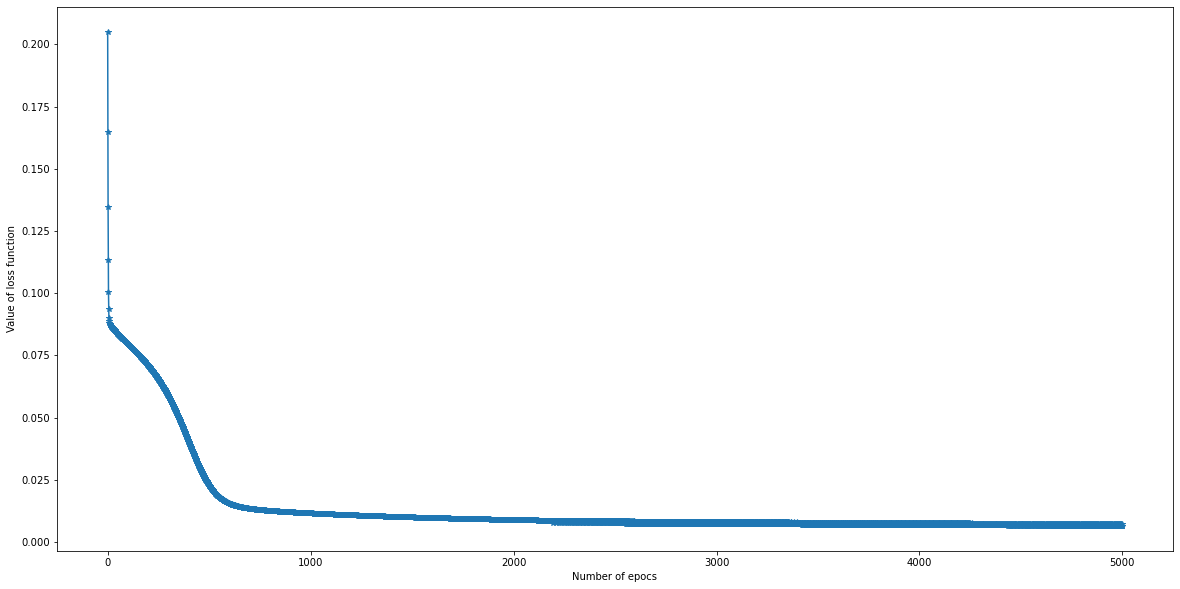

In [5]:
model = NeuralNetwork()
model.add_layer(Dense(units=3, activation=ReLU(), type=TypeOfLayer.INPUT))   # 0
model.add_layer(Dense(units=3, activation=ReLU(), type=TypeOfLayer.HIDDEN))  # 1
model.add_layer(Dense(units=3, activation=ReLU(), type=TypeOfLayer.OUTPUT))  # 2

input_data = np.array([
    [8.5, 0.65, 1.2],
    [9.5,  0.8, 1.3],
    [9.9,  0.8, 0.5],
    [9.0,  0.9, 1.0]
])

expected_output = np.array([
    [0.1, 1., 0.1],
     [0., 1., 0. ],
    [ 0., 0., 0.1],
    [0.1, 1., 0.2]
])

weight_1 = np.array([
    [ 0.1, 0.2, -0.1],
    [-0.1, 0.1,  0.9],
    [ 0.1, 0.4,  0.1]
])

weight_2 = np.array([
    [0.3, 1.1, -0.3],
    [0.1, 0.2, 0.0],
    [0.0, 1.3, 0.1]
])

model.add_weights(1, weights=weight_1)
model.add_weights(2, weights=weight_2)
model.compile(loss=MeanSquaredError(), metrics=[])
model.input = input_data
model.fit(x=input_data, y=expected_output, epochs=5000, learning_rate=0.01, debug=False)
statistics = model.statistics
history_error_for_epocs = statistics.error_for_epocs
plt.figure(figsize=(20,10))
plt.plot(history_error_for_epocs, '-*')
plt.xlabel('Number of epocs')
plt.ylabel('Value of loss function')
plt.show()

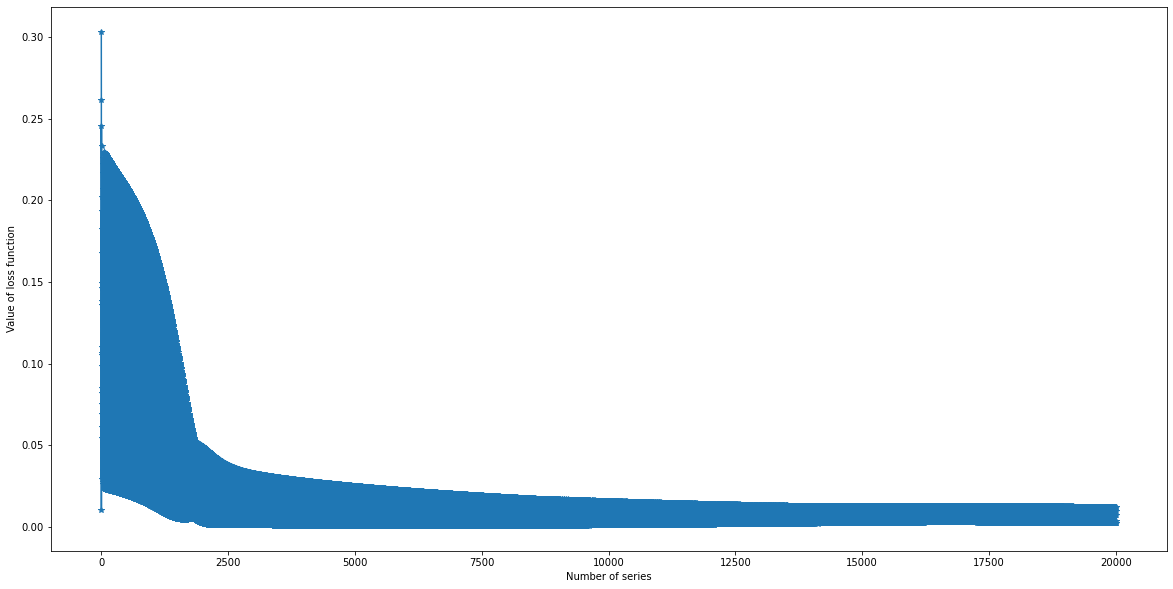

In [6]:
history_error_for_series = statistics.error_for_series
plt.figure(figsize=(20,10))
plt.plot(history_error_for_series, '-*')
plt.xlabel('Number of series')
plt.ylabel('Value of loss function')
plt.show()

<h2>Laboratorium 3 Zadanie 3</h2>
<h3>
    <p>Zmodyfikuj sieć z zadania 3 laboratorium 2 tak, aby składała się z 3 neuronów w warstwie wejścio-wej i 4 w warstwie wyjściowej. Celem sieci jest nauczenie się rozpoznawania kolorów (czerwony (1),zielony (2), niebieski (3), żółty (4)) na podstawie 3 wartości składowych koloru (RGB). Poszczególneneurony w warstwie wyjściowej oznaczają odpowiedź sieci dla danego koloru, przyjmij, że ostatecz-nym kolorem, jaki sieć zwróciła jest neuron z najwyższą wartością. W procesie uczenia przyjmij, żeoczekiwane wartości na wyjściu to 0 dla neuronów nieodpowiadających danemu kolorowi oraz 1 nawyjściu odpowiadającemu kolorowi.</p>
        <br><p>Na przykład wejście[0.91    0.82    0.05]odpowiada kolorowi o ID 4 (żółty). Więc wektor oczeki-wanej odpowiedzi sieci dla takich danych wejściowych powinien wyglądać następująco[0    0    0    1].</p><br>
<ul>
    <li>Zbiór treningowy - zbiór, na którym następuje proces uczenia sieci, dostępny jest pod linkiem:http://pduch.iis.p.lodz.pl/PSI/training_colors.txt.
    <li>Zbiór testowy - zbiór, dla którego sprawdzana jest poprawność działania sieci, dostępny jestpod linkiem:http://pduch.iis.p.lodz.pl/PSI/test_colors.txt.
</ul>
    <p>W pierwszym etapie program uczy sieć neuronową na przykładzie zbioru treningowego (zwróćuwagę, że może być konieczność przeprowadzenia kilku / kilkudziesięciu iteracji). Po zakończeniuprocesu uczenia sprawdzana jest skuteczność sieci na podstawie zbioru testowego.Porównaj wyniki otrzymywane dla tej sieci z wynikami otrzymanymi w zadaniu 4 z laboratorium2. Która sieć potrzebuje więcej czasu, żeby nauczyć się rozpoznawania kolorów?</p></h3>

<h2>Wczytanie zestawu danych treningowych i testowych z plików</h2>

In [7]:
from activations.ReLU import ReLU
from enums.TypeOfLayer import TypeOfLayer
from loss.CategoricalCrossEntropy import CategoricalCrossEntropy
from loss.MeanSquaredError import MeanSquaredError
from metrics.Accuracy import Accuracy
from models.Layer import Layer
from models.NeuralNetwork import NeuralNetwork
from models import NeuralStatistics
import numpy as np
import matplotlib.pyplot as plt

In [8]:
import os
training_file = "training_colors.txt"
test_file = "test_colors.txt"
global_path_to_training_file = os.path.abspath(training_file)
global_path_to_test_file = os.path.abspath(test_file)

def extract_set_data(path_to_file: str):	
    f = open(path_to_file, "r")
    text = f.read()
    lines = text.split('\n')
    list_data = []
    for line in lines:
        list_data.append(np.array(line.split(' '), dtype=float))
    f.close()
    return np.asarray(list_data)

def prepare_expected_value(y,xy):
    tmp_array = np.zeros(xy.shape)
    index = 0
    for yt in y:
        index_color = int(yt[0] - 1)
        tmp_array[index, index_color] = 1
        index += 1
    return tmp_array
    
training_set = extract_set_data(global_path_to_training_file)
training_set_x = training_set[:,:3]
training_set_y = training_set[:,3:4]
training_expected_value = prepare_expected_value(training_set_y, training_set)

test_set = extract_set_data(global_path_to_test_file)
test_set_x = test_set[:,:3]
test_set_y = test_set[:,3:4]
test_expected_value = prepare_expected_value(test_set_y, test_set)
print(test_expected_value)

[[0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0.

<h2>Oględziny wizualne zbioru treningowego - XY</h2>

In [9]:
print(training_set[:5])

[[0.91 0.82 0.05 4.  ]
 [0.91 0.09 0.26 1.  ]
 [0.89 0.9  0.18 4.  ]
 [0.82 0.04 0.08 1.  ]
 [0.19 0.91 0.   2.  ]]


<h2>Oględziny wizualne zbioru treningowego - Y</h2>

In [10]:
print(training_expected_value[:5])

[[0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]


<h2>Utworzenie modelu sieci</h2>

In [11]:
model = NeuralNetwork()
model.add_layer(Dense(units=3, activation=ReLU(), type=TypeOfLayer.INPUT))   # 0
model.add_layer(Dense(units=3, activation=ReLU(), type=TypeOfLayer.HIDDEN))  # 1
model.add_layer(Dense(units=4, activation=ReLU(), type=TypeOfLayer.OUTPUT))  # 2

weight_1 = np.array([
    [ 0.1, 0.2, -0.1],
    [-0.1, 0.1,  0.9],
    [ 0.1, 0.4,  0.1]
])

weight_2 = np.array([
    [0.3, 1.1, -0.3],
    [0.1, 0.2, 0.0],
    [0.0, 1.3, 0.1],
    [0.1, 0.2, 0.3]
])

model.add_weights(1, weights=weight_1)
model.add_weights(2, weights=weight_2)

model.compile(loss=MeanSquaredError(), metrics=[Accuracy()])


<h2>Trenowanie sieci</h2>

In [12]:
model.fit(x=training_set_x, y=training_expected_value, epochs=100, learning_rate=0.01, debug=False)
statistics: NeuralStatistics = model.statistics
acc = Accuracy().count_value(training_expected_value, model.predict[TypeOfData.TRAINING])

print("\nAccuracy for training: ", acc)

Teaching progress: [------------------->] 100.000000 %
Accuracy for training:  100.0


<h2>Wykres zmiany wartości funckji celu od numeru epoki</h2>

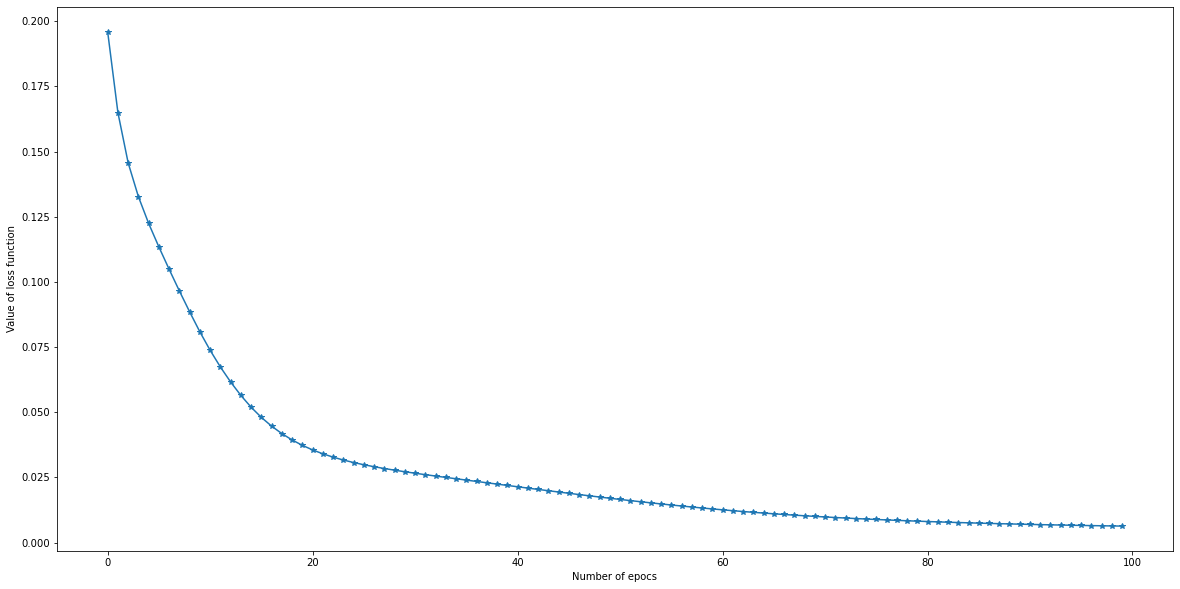

In [13]:
history_error = statistics.error_for_epocs
plt.figure(figsize=(20, 10))
plt.plot(history_error, '-*')
plt.xlabel('Number of epocs')
plt.ylabel('Value of loss function')
plt.show()


<h2>Wykres zmiany accuracy od numeru epoki</h2>

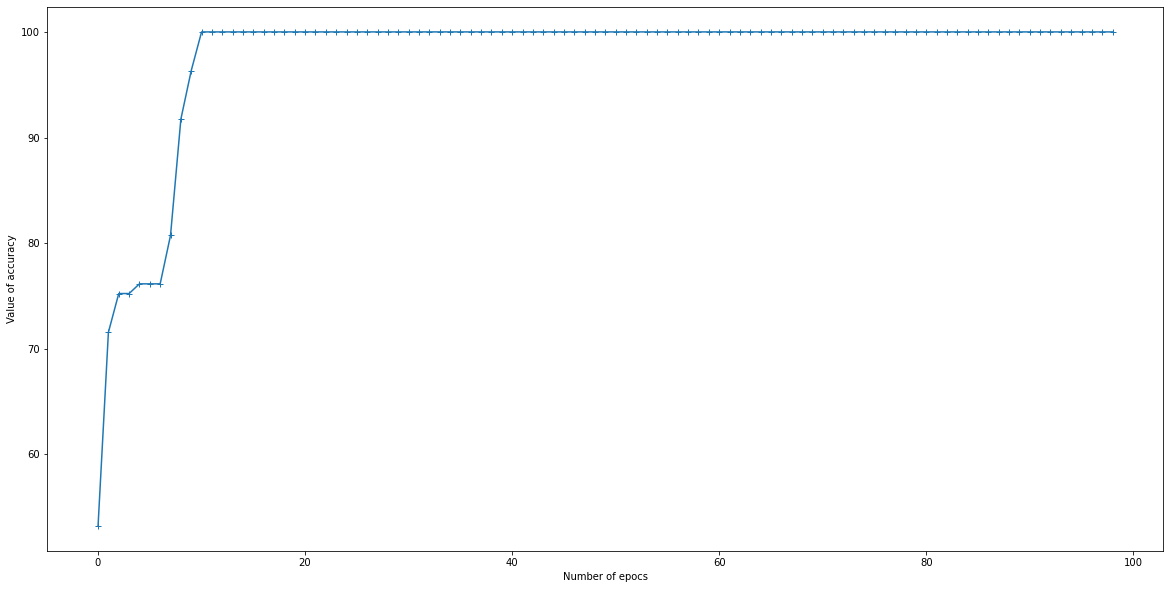

In [14]:
history_accuracy = statistics.history_metrics['accuracy']
plt.figure(figsize=(20, 10))
plt.plot(history_accuracy, '-+')
plt.xlabel('Number of epocs')
plt.ylabel('Value of accuracy')
plt.show()

<h2>Wykres zmiany błędy skorelowanego od numeru epoki</h2>

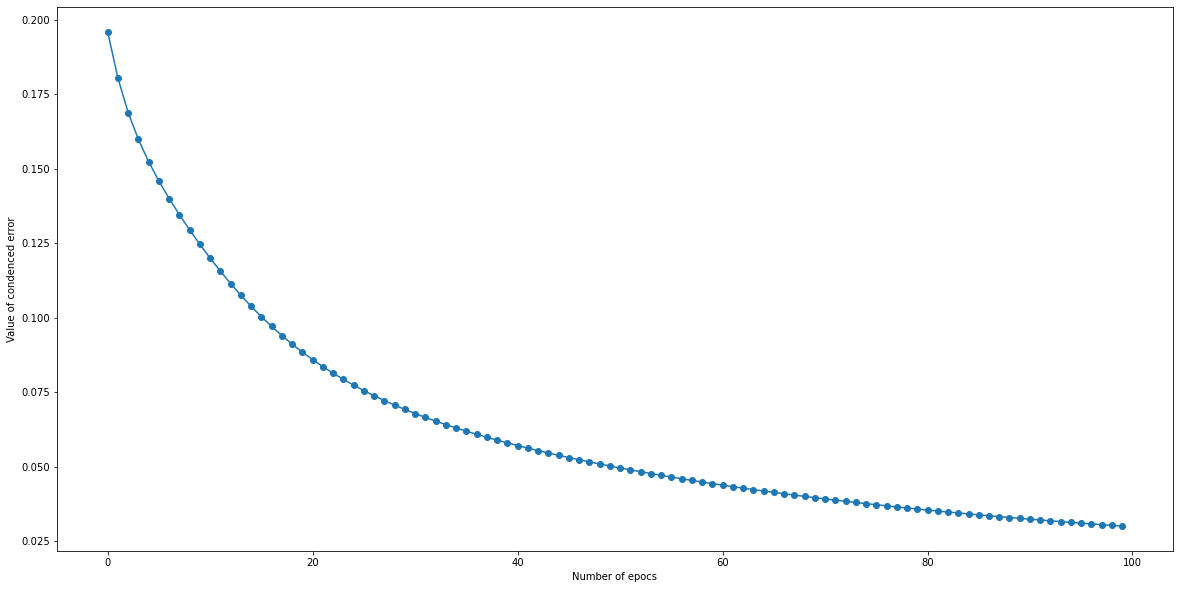

In [15]:
condensed_error = statistics.condensed_error
plt.figure(figsize=(20, 10))
plt.plot(condensed_error, '-o')
plt.xlabel('Number of epocs')
plt.ylabel('Value of condenced error')
plt.show()

<h2>Wykres zmiany wartości funkcji celu od numeru seri</h2>

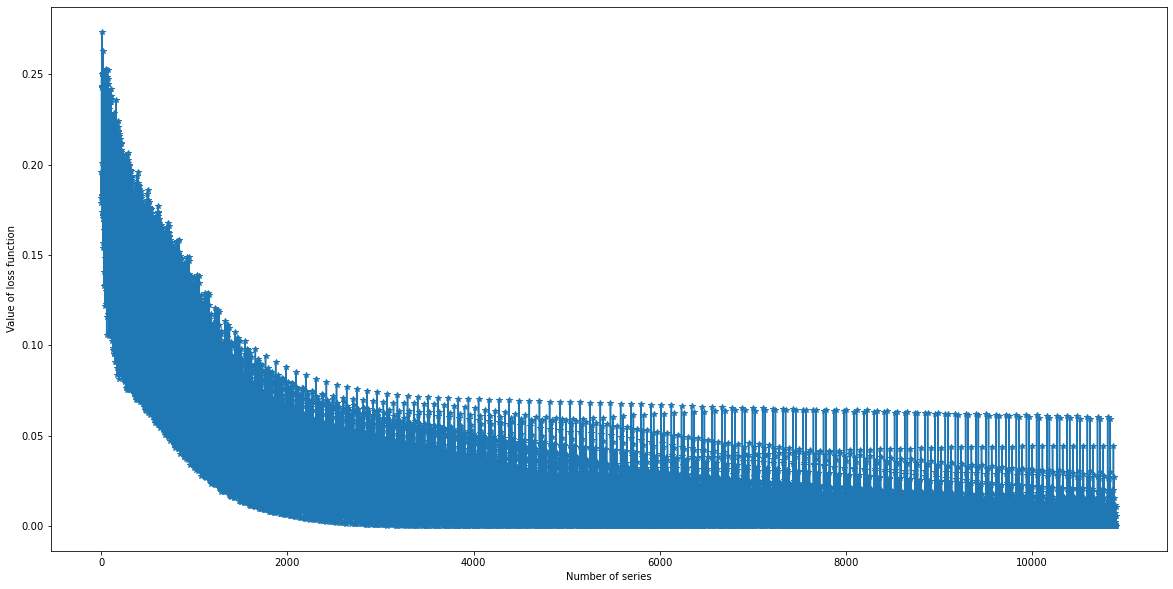

In [16]:
history_error = statistics.error_for_epocs
history_error_for_series = statistics.error_for_series
plt.figure(figsize=(20,10))
plt.plot(history_error_for_series, '-*')
plt.xlabel('Number of series')
plt.ylabel('Value of loss function')
plt.show()

<h2>Testowanie sieci</h2>

In [17]:
from enums.TypeOfData import TypeOfData

model.valid(x_test=test_set_x, y_test=test_expected_value, debug=False)
predict = model.predict[TypeOfData.TEST]

def prepare_predict(predict):
    predict_color_array = np.zeros(predict.shape[0])
    index = 0
    for rekord in predict:
        max_from_rekord = max(rekord)
        for index_with_max in range(predict.shape[1]):
            if predict[index, index_with_max] == max_from_rekord:
                predict_color_array[index] = index_with_max
                index += 1
                break
    return predict_color_array


predicted_values = prepare_predict(predict)
print('\nPredicted value')
print(predicted_values)
print('Test value')
test_values = test_set_y.flatten()-1
print(test_values)
mse = Accuracy()
accuracy = mse.count_value(test_values, predicted_values)
print('accuracy', accuracy, ' %')

Teaching progress: [------------------->] 100.000000 %
Predicted value
[3. 1. 2. 1. 0. 2. 0. 2. 3. 2. 2. 2. 3. 2. 0. 3. 2. 2. 0. 3. 1. 2. 3. 0.
 0. 3. 2. 2. 3. 0. 3. 2. 0. 1. 3. 0. 3. 2. 0. 3. 3. 3. 2. 1. 0. 3. 3. 0.
 1. 1. 3. 1. 1. 1. 2. 0. 0. 0. 1. 1. 1. 3. 3. 1. 3. 3. 0. 0. 1. 0. 0. 3.
 1. 2. 3. 3. 2. 2. 3. 2. 1. 3. 2. 0. 3. 0. 1. 3. 2. 2. 0. 1. 2. 0. 1. 1.
 1. 3. 1. 2. 0. 2. 1. 0. 2. 1. 0. 0. 2. 2. 3. 2. 1. 0. 1. 2. 3. 2. 2. 0.
 3. 1. 0. 0. 2. 0. 2. 0. 0. 3.]
Test value
[3. 1. 2. 1. 0. 2. 0. 2. 3. 2. 2. 2. 3. 2. 0. 3. 2. 2. 0. 3. 1. 2. 3. 0.
 0. 3. 2. 2. 3. 0. 3. 2. 0. 1. 3. 0. 3. 2. 0. 3. 3. 3. 2. 1. 0. 3. 3. 0.
 1. 1. 3. 1. 1. 1. 2. 0. 0. 0. 1. 1. 1. 3. 3. 1. 3. 3. 0. 0. 1. 0. 0. 3.
 1. 2. 3. 3. 2. 2. 3. 2. 1. 3. 2. 0. 3. 0. 1. 3. 2. 2. 0. 1. 2. 0. 1. 1.
 1. 3. 1. 2. 0. 2. 1. 0. 2. 1. 0. 0. 2. 2. 3. 2. 1. 0. 1. 2. 3. 2. 2. 0.
 3. 1. 0. 0. 2. 0. 2. 0. 0. 3.]
accuracy 100.0  %


<h2>Laboratorium 3 Zadanie 4</h2>
<h3>Zmodyfikuj  sieć  z  zadania  5  laboratorium  1  tak,  aby  przyjmowała  jeszcze  funkcję  aktywacji  dlakażdej z warstw (pamiętaj, że nie zawsze każda warstwa będzie musiała ją posiadać). Klasa powinnaudostępniać następujące funkcje:</h3>
<h3>
<ul>
    <li>add_layer(n, [weightminvalue, weightmaxvalue, activationfunction]) -<br>  funkcja dodaje warstwę n neuronów do sieci, opcjonalnie może przyjmować zakres wartości, z którego będą  losowane  wagi  oraz  informację  o  wybranej  funkcji  aktywacji  (w  postaci  wskaźnika  nafunkcję, stringa lub w inny sposób),
    <li>fit(input, expectedoutput) -<br>
        funkcja aktualizuje wagi sieci na podstawie przekazanych doniej danych wejściowych (input) oraz oczekiwanej dla nich odpowiedzi sieci (expected output).
    </ul>
</h3>
<h3>
Zbuduj sieć składającą się z trzech warstw:<br>
    <ul>
        <li>warstwa wejściowa - 784 neurony,
            <li>warstwa ukryta - 40 neuronów,
                <li>warstwa wyjściowa - 10 neuronów.
    </ul>
    Przetestuj działania tej sieci na bazie danych MNIST1. <br>
    Sieć powinna się uczyć, bazując na częścitreningowej (pliki zaczynające się od train), a testować na części testowej (pliki zaczynające się odt10k).<br>
</h3>

In [18]:
from activations.ReLU import ReLU
from enums.TypeOfLayer import TypeOfLayer
from loss.CategoricalCrossEntropy import CategoricalCrossEntropy
from loss.MeanSquaredError import MeanSquaredError
from metrics.Accuracy import Accuracy
from models.Layer import Layer
from models.NeuralNetwork import NeuralNetwork
from models import NeuralStatistics
import numpy as np
import matplotlib.pyplot as plt

<h3>Import bazy MNIST</h3>

X_train: (60000, 28, 28, 1)
Y_train: (60000, 10)
X_test:  (10000, 28, 28, 1)
Y_test:  (10000, 10)


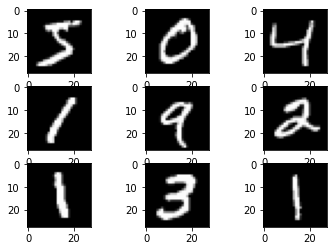

In [29]:
from keras.datasets import mnist
from matplotlib import pyplot
import keras
import keras.utils
from keras import utils as np_utils
from tensorflow.keras import utils as np_utils
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers


def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = mnist.load_data()
	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	# one hot encode target values
	trainY = keras.utils.to_categorical(trainY)
	testY = keras.utils.to_categorical(testY)
	return trainX, trainY, testX, testY


train_X, train_Y, test_X, test_Y = load_dataset()
 
#shape of dataset
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_Y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_Y.shape))

# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

train_norm = train_X.astype('float32')
test_norm = test_X.astype('float32')
# normalize to range 0-1
train_norm_X = train_norm / 255.0
test_norm_X = test_norm / 255.0

<h3>Przygotowanie modelu sieci</h3>

In [30]:
from activations.SoftMax import SoftMax
from metrics.Accuracy import Accuracy
from activations.Sigmoid import Sigmoid
model = NeuralNetwork()
model.add_layer(Dense(units=784, type=TypeOfLayer.INPUT))  # 0
model.add_layer(Dense(units=40, activation=Sigmoid(), type=TypeOfLayer.HIDDEN))  # 1
model.add_layer(Dense(units=10, activation=SoftMax(), type=TypeOfLayer.OUTPUT))  # 2

model.compile(loss=MeanSquaredError(), metrics=[Accuracy()])


<h3>Przygotowanie danych</h3>

In [31]:
# train_X = train_X.reshape((train_norm_X.shape[0]-5000, 28*28))
# test_X = test_X.reshape((test_norm_X.shape[0]-5000, 28*28))
print('Original shapes')
print('train_X.shape: ',train_X.shape)
print('test_X.shape: ',test_X.shape)
train_X_reshaped = train_X.reshape((train_norm_X.shape[0], 28*28))
test_X_reshaped = test_X.reshape((test_norm_X.shape[0], 28*28))
print('After shapes')
print('train_X_reshaped.shape: ',train_X_reshaped.shape)
print('test_X_reshaped.shape: ',test_X_reshaped.shape)
n = 1_000
print('After scalled')
train_X_scaled = train_X_reshaped[:n]
train_Y_scaled = train_Y[:n]
print('train_X_scaled.shape: ',train_X_scaled.shape)
print('train_Y_scaled.shape: ',train_Y_scaled.shape)

Original shapes
train_X.shape:  (60000, 28, 28, 1)
test_X.shape:  (10000, 28, 28, 1)
After shapes
train_X_reshaped.shape:  (60000, 784)
test_X_reshaped.shape:  (10000, 784)
After scalled
train_X_scaled.shape:  (1000, 784)
train_Y_scaled.shape:  (1000, 10)


<h3>Trenowanie modelu</h3>

In [32]:
model.fit(x=train_X_scaled, y=train_Y_scaled, epochs=100, learning_rate=0.01)

Teaching progress: [------------------->] 100.000000 %

In [33]:
accuracy = mse.count_value(train_Y_scaled, model.predict[TypeOfData.TRAINING])
print('accuracy:', accuracy, ' %')

accuracy: 9.8  %


<h2>Wykres zmiany wartości funkcji celu od numeru epoki</h2>

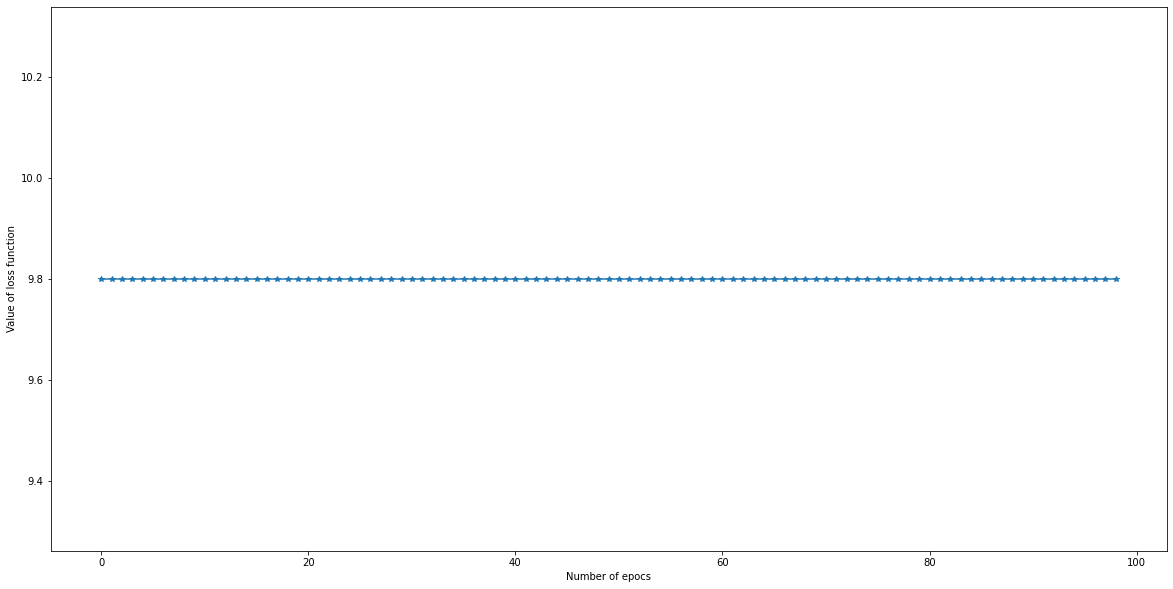

In [40]:
statistics = model.statistics

history_error_for_epocs = statistics.error_for_epocs
error_for_series = statistics.error_for_series
plt.figure(figsize=(20, 10))
plt.plot(history_error, '-*')
plt.xlabel('Number of epocs')
plt.ylabel('Value of loss function')
plt.show()


<h2>Wykres zmiany błędy skorelowanego od numeru epoki</h2>

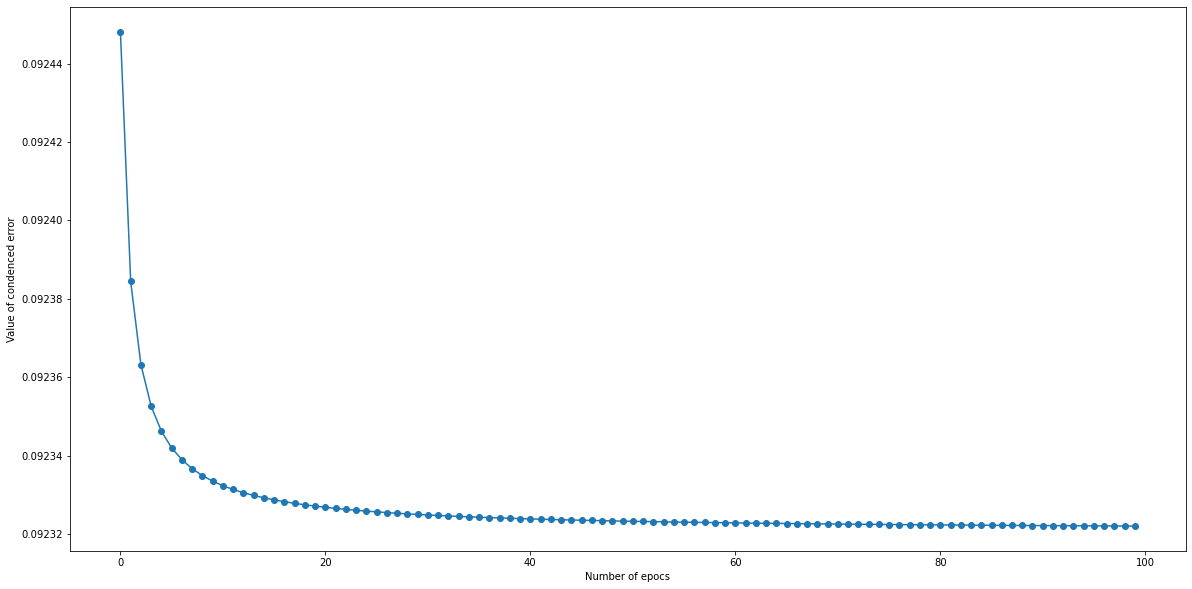

In [35]:
condensed_error = statistics.condensed_error
plt.figure(figsize=(20, 10))
plt.plot(condensed_error, '-o')
plt.xlabel('Number of epocs')
plt.ylabel('Value of condenced error')
plt.show()

<h2>Wykres zmiany wartości funkcji celu od numeru seri</h2>

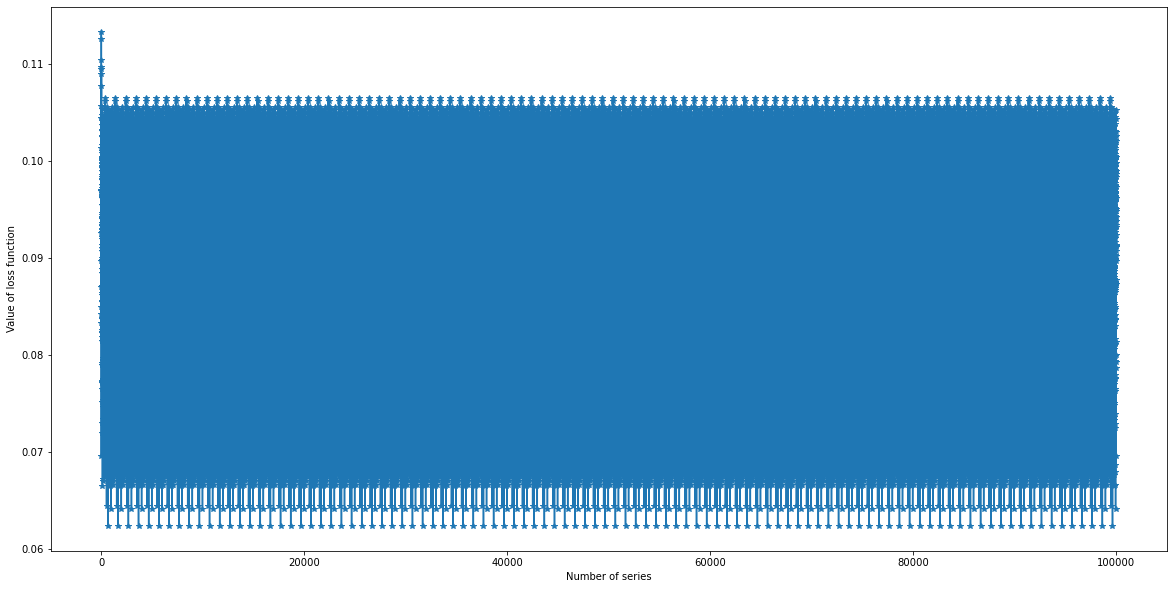

In [36]:
history_error = statistics.error_for_epocs
history_error_for_series = statistics.error_for_series
plt.figure(figsize=(20,10))
plt.plot(history_error_for_series, '-*')
plt.xlabel('Number of series')
plt.ylabel('Value of loss function')
plt.show()

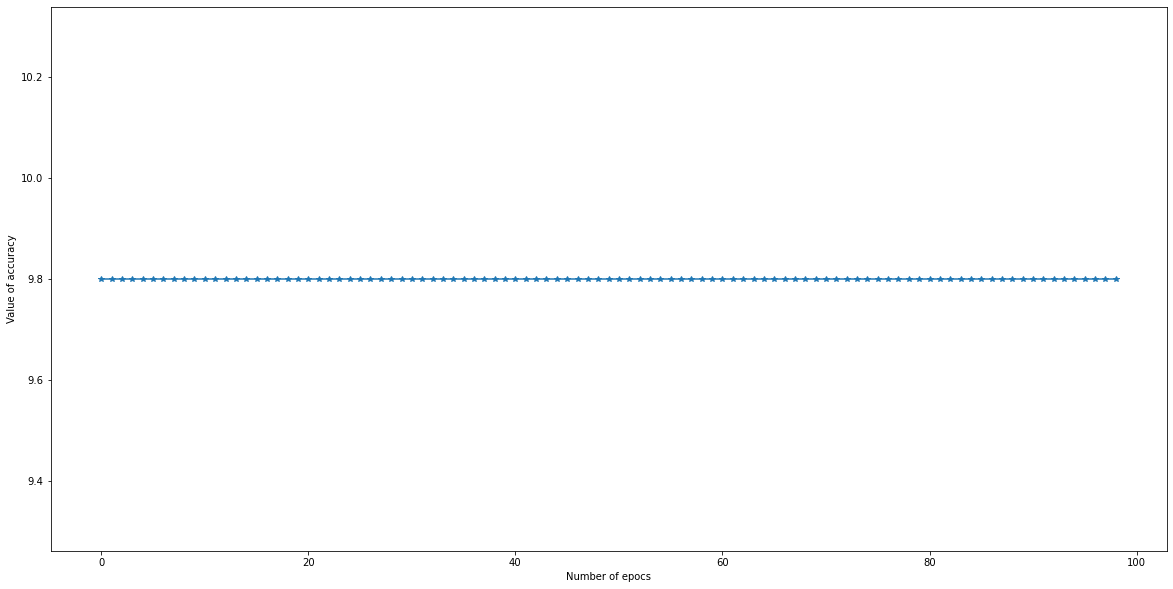

In [37]:
history_error = statistics.history_metrics['accuracy']
# history_error_for_series = statistics.error_for_series
plt.figure(figsize=(20,10))
plt.plot(history_error, '-*')
plt.xlabel('Number of epocs')
plt.ylabel('Value of accuracy')
plt.show()

In [46]:
print("test_X_shape: ", test_X_reshaped.shape)
print("test_Y.shape: ", test_Y.shape)
model.valid(x_test=test_X_reshaped, y_test=test_Y, debug=False)
predict = model.predict


predicted_values = predict[TypeOfData.TEST]
# print('Predicted value')
# print(predicted_values)
# print('Test value')
test_values = test_Y
# print(test_values)
mse = Accuracy()
accuracy = mse.count_value(test_values, predicted_values)
print('\naccuracy:', accuracy, ' %')

test_X_shape:  (10000, 784)
test_Y.shape:  (10000, 10)
Teaching progress: [------------------->] 100.000000 %
accuracy: 9.58  %


<h2>Laboratorium 4 Zadanie 1</h2>
<h3>Dodaj  do  warstwy  ukrytej  sieci  z  zadania  4  laboratorium  3  metodę  Dropout.  Będzie  to  polegało na  wyzerowaniu  dla  każdej  serii  danych  treningowych  pewnej  liczby  losowych  neuronów  z  warstwy  ukrytej,  w  tym  przypadku  przyjmij,  że  będzie  to  50%  neuronów.  Na  początku  treningu  dla poszczególnych serii należy utworzyć wektor, który będzie miał tyle samo elementów ile jest neuronów  w  warstwie  ukrytej,  a  następnie  wypełnić  go  losowo  wartościami  0  i  1  w  taki  sposób,  aby było  ich  mniej  więcej  po  równo.  Następnie  należy  pomnożyć  wartości  neuronów  warstwy  ukrytej przez  ten  wektor,  spowoduje  to  wyzerowanie  losowych  neuronów.  Dodatkowo,  pozostałe  wartościneuronów muszą zostać pomnożone przez 2. Jest to spowodowane tym, że każda kolejna warstwa 26
wyznacza sumę ważoną z elementów warstwy poprzedniej, skoro część neuronów została usunięta(ich  wartości  zostały  wyzerowane),  to  wynik  sumy  ważonej  będzie  zakłócony  (w  tym  przypadku mniejszy o połowę). W celu zapobiegnięcia temu, należy pomnożyć wartości pozostałych neuronów przez  [1/procent wlaczonych neuronow](w  tym  przypadku  będzie  to  1/0.5,  czyli  2).  Należy  również pamiętać o wyzerowaniu błędu dla tych neuronów z warstwy ukrytej, których wartości zostały wyzerowane. Przetestuj działanie tej sieci na bazie danych MNIST, dla następujących parametrów:</h3>
<h3>
<ul>
    <li>40  neuronów  w  warstwie  ukrytej,  1000  obrazów  w  zbiorze  treningowym,  10000  obrazów  wzbiorze testowym, współczynnik uczenia 0.005, wagi z zakresu<−0.1,0.1>, 350 iteracji,
    <li>100 neuronów w warstwie ukrytej, 10000 obrazów w zbiorze treningowym, 10000 obrazów wzbiorze testowym, współczynnik uczenia 0.005, wagi z zakresu<−0.1,0.1>, 350 iteracji,
    <li>100 neuronów w warstwie ukrytej, 60000 obrazów w zbiorze treningowym, 10000 obrazów wzbiorze testowym, współczynnik uczenia 0.005, wagi z zakresu<−0.1,0.1>, 350 iteracji.
</ul>
        </h3>